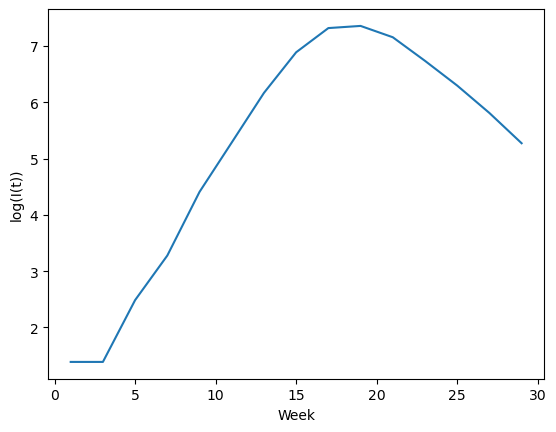

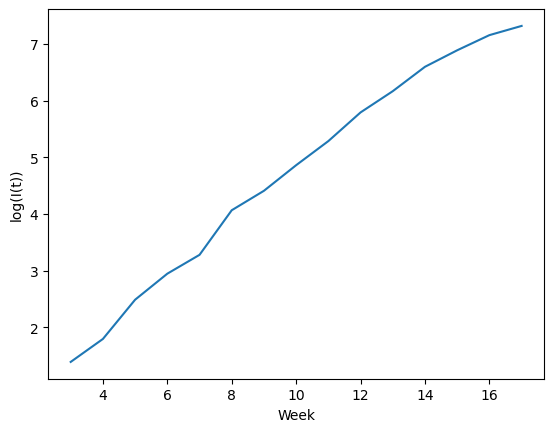

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


casedata = pd.read_csv("HW4_all_weeks.csv")

casedata["true_new_cases"] = casedata["New Cases"]   

gamma = 0.5
I = []
prev = 0

for c in casedata["true_new_cases"]:
    prev = (1-gamma)*prev+c
    I.append(prev)
casedata["total_infected"] = I

testexpgrowth = casedata[(casedata["Week"]) & (casedata["Week"] <= 30)]

plt.plot(testexpgrowth["Week"], np.log(testexpgrowth["total_infected"]))
plt.xlabel("Week")
plt.ylabel("log(I(t))")
plt.show()

expgrowth = casedata[(casedata["Week"] >= 3) & (casedata["Week"] <= 17)]

plt.plot(expgrowth["Week"], np.log(expgrowth["total_infected"]))
plt.xlabel("Week")
plt.ylabel("log(I(t))")
plt.show()


t = expgrowth["Week"]
y = np.log(expgrowth["total_infected"])

slope, intercept, r_value, p_value, std_err = stats.linregress(t, y)

m = slope  

t_crit = stats.t.ppf(0.975, df=len(t)-2)
ci_lower = m-t_crit*std_err
ci_upper = m+t_crit*std_err

In [16]:
m

np.float64(0.44057592143312135)

In [19]:
std_err

np.float64(0.012809552593377826)

In [18]:
t_crit

np.float64(2.1603686564610127)

In [20]:
ci_upper

np.float64(0.4682492773591437)

In [21]:
ci_lower

np.float64(0.41290256550709903)